<a href="https://colab.research.google.com/github/ylmgrbzz/Deep-Learning-Projects-With-Keras-TensorFlow-PyTorch/blob/main/Image_Classification_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape, X_test.shape


((60000, 28, 28), (10000, 28, 28))

In [4]:
class_names = ["T-shirt / top", "Trouser", "Pullover", "Dress",
        "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

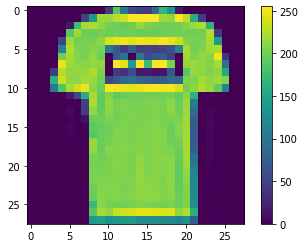

In [7]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow (X_train[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
model = tf.keras.Sequential ([
   tf.keras.layers.Flatten (input_shape = (28, 28), name = "Input"),
   tf.keras.layers.Dense (128, activation = 'relu', name = "Hidden"),
   tf.keras.layers.Dense (10, name = "Output")
])

In [10]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Flatten)             (None, 784)               0         
                                                                 
 Hidden (Dense)              (None, 128)               100480    
                                                                 
 Output (Dense)              (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.layers


In [13]:
weights, biases = hidden.get_weights ()
print(weights)

[[-0.02678146 -0.05663881  0.03317056 ... -0.0611012   0.07905748
   0.02933771]
 [ 0.05973189 -0.04100292 -0.00065099 ... -0.00191469 -0.02140578
  -0.00389999]
 [-0.0515263  -0.00821064  0.0077527  ... -0.01721441 -0.00910538
  -0.07169754]
 ...
 [ 0.02749693  0.04391221 -0.0487406  ...  0.03725056  0.07757611
   0.03723706]
 [ 0.00353065 -0.02342727  0.01457798 ... -0.0794084   0.02178461
   0.07741008]
 [-0.00059599 -0.01918564  0.06156611 ...  0.01082597 -0.06063771
   0.00268979]]


In [14]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(
                         from_logits = True),
              optimizer = 'adam',
              metrics = ['accuracy'])

In [15]:
history = model.fit (X_train, y_train, epochs = 10, validation_split = 0.1)


Epoch 1/10
1688/1688 [==============================] - 9s 3ms/step - loss: 0.5051 - accuracy: 0.8222 - val_loss: 0.3967 - val_accuracy: 0.8597
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3810 - accuracy: 0.8628 - val_loss: 0.4138 - val_accuracy: 0.8462
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3392 - accuracy: 0.8771 - val_loss: 0.3395 - val_accuracy: 0.8728
Epoch 4/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3128 - accuracy: 0.8861 - val_loss: 0.3294 - val_accuracy: 0.8798
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2947 - accuracy: 0.8919 - val_loss: 0.3324 - val_accuracy: 0.8812
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2793 - accuracy: 0.8981 - val_loss: 0.3212 - val_accuracy: 0.8828
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2671 - accuracy: 0.9010 - val_loss: 0.3253 - val_accuracy:

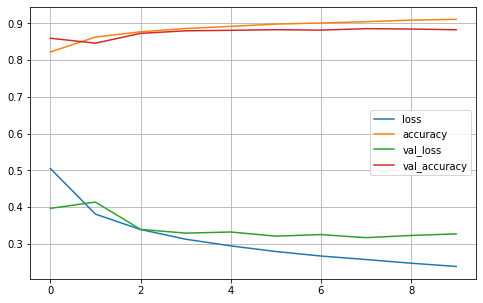

In [16]:
import pandas as pd
pd.DataFrame (history.history).plot (figsize = (8, 5))
plt.grid(True)
plt.show()

In [17]:
test_loss, test_acc = model.evaluate (X_test, y_test, verbose = 2)
print ('\ nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3477 - accuracy: 0.8791 - 725ms/epoch - 2ms/step
\ nTest accuracy: 0.8791000247001648


In [19]:
probability_model = tf.keras.Sequential ([model, tf.keras.layers.Softmax()])


In [20]:
predictions = probability_model.predict(X_test)


313/313 [==============================] - 0s 1ms/step


In [21]:
predictions[0]


array([1.0985394e-05, 5.9248130e-08, 2.7380048e-07, 1.5868320e-08,
       1.9228469e-06, 3.3668627e-04, 8.2520310e-06, 6.7087943e-03,
       1.3557649e-07, 9.9293292e-01], dtype=float32)

In [22]:
import numpy as np
np.argmax(predictions[0])

9

In [23]:
y_test[0]


9